<a href="https://colab.research.google.com/github/rpizarrog/Analisis-Inteligente-de-datos/blob/main/Pyhton%20documentos/Caso_1_Regresi%C3%B3n_Lineal_Simple_Peso_EstaTura_datos_FIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: "RUBEN PIZARRO GURROLA
Date: "06-03-2022"

# Objetivo

Realizar predicciones de peso de jugadores de fútbol con los datos de FIFA de acuerdo a la variable estatura a partir de un modelo de regresión lineal simple.

# Descripción 
* Cargar librerías

* Cargar datos

* Seleccionar variables de estudio estatura y peso

* Crear datos de entrenamiento y datos de validación

* Construir el modelo de regresión lineal simple

* Evaluar el modelo

* Realizar predicciones con los datos validación

* Realizar predicciones con datos nuevos

* Interpretación del caso

# Desarrollo


# Cargar librerias

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
#%matplotlib inline

## Cargar datos

Los datos se encuentran en la URL: https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.FIFA.limpios.csv



In [49]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.limpios.csv", encoding='latin1')


## Explorar datos

Solo se describen las variables de interés Estatura y PesoKgs

In [50]:
#datos.describe()
datos[['Estatura', 'PesoKgs']].describe()
# datos.head()



,Estatura,PesoKgs
count,17907.000000,17907.000000
mean,1.812325,75.279478
std,0.067671,7.077378
min,1.550000,49.900000
25%,1.750000,69.850000
50%,1.800000,74.840000
75%,1.850000,79.830000
max,2.060000,110.220000


Verificar si hay datos nulos ...

In [7]:
print(datos['Estatura'].isnull().sum().sum())
print(datos['PesoKgs'].isnull().sum().sum())

0
0


Mostrando los nombres de columnas y si se quisiera se puediera cambiar nombre a las columna para mejor control

In [51]:
# datos.columns
# datos = datos.rename(columns={'Unnamed: 0':'X'})
datos.columns

Index(['Unnamed: 0', 'X', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Preferred.Foot', 'International.Reputation', 'Weak.Foot',
       'Skill.Moves', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Valor', 'Estatura',
       'PesoKgs'],
      dtype='object')

### head()
Primeros 20 registros

In [9]:
datos[['X', 'Name', 'Estatura', 'PesoKgs']].head(20)

,X,Name,Estatura,PesoKgs
0,1,L. Messi,1.70,72.12
1,2,Cristiano Ronaldo,1.88,83.01
2,3,Neymar Jr,1.75,68.04
3,4,De Gea,1.93,76.20
4,5,K. De Bruyne,1.80,69.85
5,6,E. Hazard,1.73,73.94
6,7,L. Modric,1.73,66.22
7,8,L. Suárez,1.83,86.18
8,9,Sergio Ramos,1.83,82.10
9,10,J. Oblak,1.88,87.09


## tail() 
Últimos 20 registros

In [52]:
datos[['X', 'Name', 'Estatura', 'PesoKgs']].tail(20)

,X,Name,Estatura,PesoKgs
17887,17936,C. Ehlich,1.78,73.03
17888,17937,L. Collins,1.78,67.13
17889,17938,A. Kaltner,1.78,74.84
17890,17939,L. Watkins,1.75,79.83
17891,17940,J. Norville-Williams,1.80,76.20
17892,17941,S. Squire,1.85,74.84
17893,17942,N. Fuentes,1.73,66.22
17894,17943,J. Milli,1.91,84.82
17895,17944,S. Griffin,1.73,63.96
17896,17945,K. Fujikawa,1.70,66.22


## Partir datos en datos de entrenamiento y datos de validación

Las variables de interés serán Estaura y PesoKgs  de los datos de entrenamiento. 

De las dos variables de interés, Estatura y PesoKgs se determina que la variable predictora es Estatura y el PesoKgs es la variable de respuesta o también:

* Estatura es variable independiente y

* PesoKgs es variable dependiente

* Es decir, la variable PesoKgs depende de la Estatura
Con la función loc[:'atributo'] se eligen las variables de interés del conjunto de datos



In [53]:

# estatura = datos.loc[:, 'Estatura'].values
# pesokgs = datos.loc[:, 'PesoKgs'].values


Preparando los datos con función array.reshape(-1, 1). -1, 1 significa que son todos los datos de un arreglo de una dimensión.

In [54]:
# estatura = datos[['Estatura']].reshape(-1, 1)
# pesokgs = pesokgs.reshape(-1, 1)

estatura = datos[['Estatura']].to_numpy()
pesokgs = datos[['PesoKgs']].to_numpy()



### Datos de entrenamiento y datos de validación (test)

Ahora que se tiene la variable independiente estarur y la variable dependiente pesokgs, el siguiente paso es dividir estos datos en conjuntos de entrenamiento y prueba o validación.

Se utiiza el método *train_test_split()* que forma parte de la librería Scikit-Learn.

El argumento test_size establece el 30% para datos de validación por lo que el 70% pertenece a los datos de entrenamiento

In [55]:
estatura_train, estatura_test, pesokgs_train, pesokgs_test = train_test_split(estatura, pesokgs, test_size=0.3, random_state=2022)


## Creando el modelo

Se construirá el modelo usando *LinearRegression a partir* de la librería *sklearn.linear_model* con los datos de entrenamiento 

In [56]:
estatura_train

array([[1.85],
       [1.93],
       [1.85],
       ...,
       [1.83],
       [1.75],
       [1.78]])

In [58]:
modelo = LinearRegression()
modelo.fit(estatura_train, pesokgs_train)

LinearRegression()

### Dispersión de los datos
Dispersión de los datos de entrenamiento construeno la linea de tendencia y haciendo un diagrama de dispersión con las variables estatura y peso de los datos de entrenamiento.

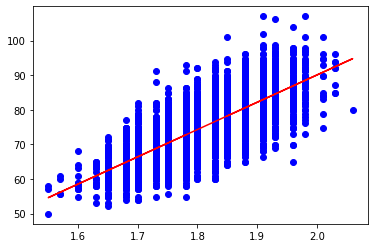

In [59]:
linea_tendencia = modelo.predict(estatura_train)
plt.plot(estatura_train, pesokgs_train, 'o', color= 'blue')
plt.plot(estatura_train, linea_tendencia, color="red") 

### Coeficientes

$$
Y = a + bx
$$

ó 

$$
Y = \beta_0 + \beta_1\cdot x
$$



In [60]:
a = modelo.intercept_
b = modelo.coef_

print("Valor de a: ", a)
print("Valor de b; ", b)

Valor de a:  [-67.50986539]
Valor de b;  [[78.78539487]]


## Predicciones 

Las predicciones se hacen con el conjunto de datos de validación.

In [61]:
predicciones = modelo.predict(estatura_test)
predicciones

array([[72.72813748],
       [72.72813748],
       [70.36457563],
       ...,
       [80.60667697],
       [80.60667697],
       [72.72813748]])

In [62]:
pesokgs_test

array([[66.22],
       [77.11],
       [73.03],
       ...,
       [83.01],
       [79.83],
       [67.13]])

Crear un *data.frame* llamado *comparaciones* a partir de la creación de un diccionario con los valores reales del conjunto de entrenamiento y las predicciones calculadas. 

Con la función *flatten().tolist()* convierte el arreglo a una lista de una dimensión.


In [63]:
diccionario = {'Estatura': estatura_test.flatten().tolist(),
                'Real' : pesokgs_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
diccionario

comparaciones = pd.DataFrame(diccionario)



In [182]:
comparaciones.head(20)


,Estatura,Real,Predicho
0,1.78,66.22,72.728137
1,1.78,77.11,72.728137
2,1.75,73.03,70.364576
3,1.91,88.00,82.970239
4,1.88,73.03,80.606677
5,1.78,74.84,72.728137
6,1.83,74.84,76.667407
7,1.75,71.21,70.364576
8,1.73,71.21,68.788868
9,1.78,78.02,72.728137


In [183]:
comparaciones.tail(20)

,Estatura,Real,Predicho
5353,1.93,79.83,84.545947
5354,1.93,86.18,84.545947
5355,1.85,78.02,78.243115
5356,1.75,73.94,70.364576
5357,1.91,79.83,82.970239
5358,1.83,78.93,76.667407
5359,1.78,72.12,72.728137
5360,1.91,82.10,82.970239
5361,1.93,91.17,84.545947
5362,1.78,78.02,72.728137


## Evaluando el modelo

Se evalúa el modelo de regresión lineal simple: 

$$
MAE = Pendiente ...
$$

$$
MSE = \frac{\sum(predicho_i - real_i)^{2}}{n}
$$

$$
RMSE = \sqrt{\frac{\sum(predicho_i - real_i)^{2}}{n}}
$$

$$
\text{Multipel R Squared } = R^2 = cor(x, y)^2 \text{; de Pearson}
$$



In [64]:
print('Mean Absolute Error: MAE', metrics.mean_absolute_error(pesokgs_test, predicciones))
print('Mean Squared Error: MSE', metrics.mean_squared_error(pesokgs_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(pesokgs_test, predicciones)))

r = np.corrcoef(estatura_train.flatten().tolist(), pesokgs_train.flatten().tolist())
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('Multiple R Square :', np.round(r, 4) )




Mean Absolute Error: MAE 3.6326520421791213
Mean Squared Error: MSE 21.813749730525867
Root Mean Squared Error RMSE: 4.670519214233667
Multiple R Square : 0.5681


# Interpretación

Pendiente ...

# Bibliografía

[https://pharos.sh/regresion-lineal-en-python-con-scikit-learn/](https://pharos.sh/regresion-lineal-en-python-con-scikit-learn/)